In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pipic import consts,types
from ipywidgets import interact

# Laser wakefield acceleration - introduction

### Ponderomotive force

Electron fluid momentum equation (cold limit):
$$\frac{d \vec{p}}{dt}=-q[\vec{E}+\frac{\vec{v}\times\vec{B}}{c}]$$

with $d/dt=\partial/\partial t+\vec{v}\cdot\nabla$, $\vec{E}=-\frac{1}{c}\frac{\partial \vec{A}}{\partial t}$, $\vec{B}=\nabla\times\vec{A}$ with $\vec{A}=A_0(z)cos(kz+\omega t)$ where A_0 is slowly varying with z.

Assume that $\vec{p}$ can be split into one fast varying and one slow varying part: $\vec{p}=\vec{p_f}+\vec{p_s}$. Also assume that the fast varying component will act as if there is no change in $A_0$. i.e $\frac{\partial\vec{p_f}}{\partial t}= -qE=\frac{q}{c}\frac{\partial \vec{A}}{\partial t}\rightarrow\vec{p_f}=\frac{q}{c}\vec{A} $ and insert in the fluid momentum eq:

$$
\frac{d\vec{p_s}+\vec{p_f}}{dt}= \frac{\partial\vec{p_s}}{\partial t}+\frac{d\vec{p_f}}{dt}+\frac{\vec{p_f}}{m_e}\cdot\nabla{p_f}+\frac{\vec{p_s}}{m_e}\cdot\nabla{p_f} + \frac{\vec{p_f}}{m_e}\cdot\nabla{p_s} = -q[\vec{E}+\frac{(\vec{p_f}+\vec{p_s})\times\vec{B}}{m_ec}]
$$

subtract $\frac{\partial\vec{p_f}}{\partial t}= -qE$ and discard that goes like $\vec{p_s},\nabla p_s$ - they will be small (at least on longer timescales).

$$
\frac{d\vec{p_s}}{dt} = - \frac{\vec{p_f}}{m_e}\cdot\nabla{p_f}-q\frac{\vec{p_f}}{cm_e}\times(\nabla\times\vec{A})
$$
Inserting the expression for $\vec{p_f}$
$$
\frac{d\vec{p_s}}{dt} = -\frac{q^{2}}{2c^{2}m_e}\nabla A^{2}
$$
since $<A^2>\approx A_0^{2}$ on longer timescales and $A_0^2\propto I$ The ponderomotive force can be seen as a radiation preassure. 

### Linear and non-linear regime


To differentiate the regimes with relativistic and non-relativistic motions, (also linear and non-linear regime) we introduce $a_0=Am_e/c^{2}q$. In the linear regime $p_i=\frac{q}{c}A_i$, where $i$ is one of the transverse directions. Therefore the velocity can be estimated as $v_i=ca_0$. If $a_0=1$ the velocity is the speed of light which obviously is non-physical and an relativistic description of the system is needed, on the other hand if $a_0<<1$ then the non-relativistic assumptions can be considered valid. 

$$
a_0 << 1 : \text{linear/non-relativistic} \\
a_0 = 1 : \text{non-linear/non-relativistic} \\
a_0 >> 1 : \text{very non-linear/non-relativistic}
$$

How does this affect the wake formation?

In [36]:
cp = 50
s = 8000
ncp = s//cp
n0 = 8e18
omega_p = np.sqrt(np.pi*4*consts.electron_charge**2*n0/consts.electron_mass) # [1/s]
wp = 2*np.pi*consts.light_velocity/omega_p

with h5py.File("1d/lwfa_1d_a01.h5","r") as file:
    Exa1 = file['Ex'][:]
    rhoa1 = file['rho'][:]
    x_axis = file['x_axis'][:]



with h5py.File("1d/lwfa_1d_a010.h5","r") as file:
    Exa10 = file['Ex'][:]
    rhoa10 = file['rho'][:]
    

with h5py.File("1d/lwfa_1d_a00,1.h5","r") as file:
    Exa01 = file['Ex'][:]
    rhoa01 = file['rho'][:]
    
    

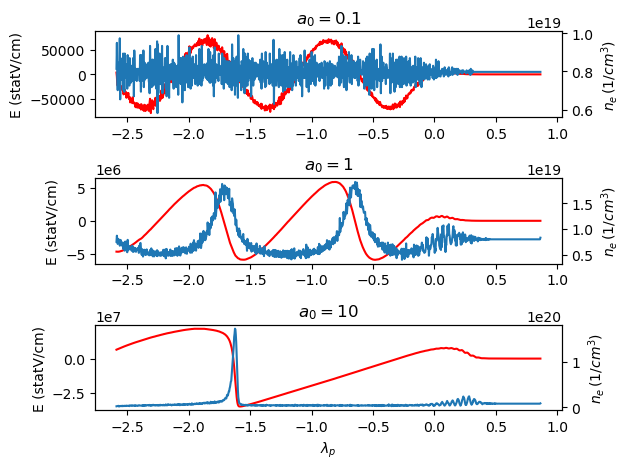

In [37]:
fig,ax = plt.subplots(3,1)
i = 10
#plt.plot(Ez[50])
ax[0].set_title('$a_0=0.1$')
ax[0].plot(x_axis/wp,-Exa01[59],'r')
a = ax[0].twinx()
a.plot(x_axis/wp,rhoa01[59])
ax[0].set_ylabel(r'E (statV/cm)')
a.set_ylabel(r'$n_e\,(1/cm^{3})$')

ax[1].set_title('$a_0=1$')
ax[1].plot(x_axis/wp,-Exa1[59],'r')
a = ax[1].twinx()
a.plot(x_axis/wp,rhoa1[59])
ax[1].set_ylabel(r'E (statV/cm)')
a.set_ylabel(r'$n_e\,(1/cm^{3})$')

ax[2].set_title('$a_0=10$')
ax[2].plot(x_axis/wp,-Exa10[59],'r')
a = ax[2].twinx()
a.plot(x_axis/wp,rhoa10[59])
ax[2].set_ylabel(r'E (statV/cm)')
a.set_ylabel(r'$n_e\,(1/cm^{3})$')

ax[2].set_xlabel(r'$\lambda_p$')

fig.tight_layout()

### Injection - density downramp and shock-front injection

Review paper LWFA:
https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.81.1229
Shock-front injection:
https://journals.aps.org/prab/pdf/10.1103/PhysRevAccelBeams.20.051301

#

In [21]:
cp = 50
s = 8000
ncp = s//cp
# Electron number density
n0 = 4e18 #1e18 # [1/cm^3]
# plasma frequency, [e] = statC, [me] = g, [n0] = 1/cm^3, [c] = cm/s
omega_p = np.sqrt(np.pi*4*consts.electron_charge**2*n0/consts.electron_mass) # [1/s]
# plasma wavelength
wp = 2*np.pi*consts.light_velocity/omega_p # [cm]
# laser wavelength
wl = 1e-4 # [cm]
# laser pulse width (spatial in x and radially in focus)
pulseDuration_FWHM = 16e-15
pulseWidth_x = (pulseDuration_FWHM/2.355)*consts.light_velocity # [cm]
spotsize = 2*pulseWidth_x
omega = 2*np.pi*consts.light_velocity/wl

nx, xmin, xmax = 2**6, -6*spotsize, 6*spotsize
ny, ymin, ymax = 2**6, -6*spotsize, 6*spotsize
nz, zmin, zmax = 2**8, -15*pulseWidth_x, 5*pulseWidth_x
nps = 2**8

timestep = 1e-1/(2*np.pi*consts.light_velocity/wl) 
dz = (zmax-zmin)/nz
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny


Ez = np.zeros((ncp,nx,ny,nz))
Ex = np.zeros((ncp,nx,ny,nz))
Ey = np.zeros((ncp,nx,ny,nz))

rho = np.zeros((ncp,nx,ny,nz))
ps = np.zeros((nx,nps)) 

y_axis = np.linspace(-1,1,ny)
x_axis = np.linspace(0,1,nx)


with h5py.File("lwfa_z.h5","r") as file: 
    
    Ez = file['Ez'][:]
    Ex = file['Ex'][:]
    Ey = file['Ey'][:]

    rho = file['rho'][:]
    ps = file['ps'][:]
    y_axis = file['y_axis'][:]
    x_axis = file['x_axis'][:]
    z_axis = file['z_axis'][:]
    p_axis = file['p_axis'][:]





Text(0.5, 1.0, 'Denisty profile')

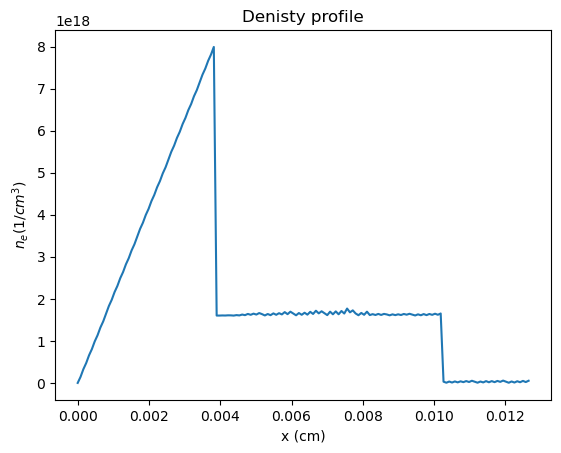

In [24]:
def density_profile(rho):
    dx = cp*timestep*consts.light_velocity
    sim_length = s*timestep*consts.light_velocity
    x = np.arange(0,sim_length,dx)
    dp = np.zeros_like(x)
    for i,rho_ in enumerate(rho):
        dp[i] = rho_[:,:,-1].mean()
    return x,dp
x,dp = density_profile(rho)

plt.plot(x,dp)
plt.xlabel('x (cm)')
plt.ylabel('$n_e (1/cm^{3})$')
plt.title('Denisty profile')

In [73]:
def radial_field(F,r,x_axis,y_axis):
    dy = np.diff(y_axis)[0]
    y_grid,x_grid = np.meshgrid(x_axis,y_axis)
    r_grid = np.sqrt((y_grid**2 + x_grid**2))
    r_mask = np.zeros_like(F)
    r_mask = np.array(r_mask, dtype=bool)

    out = np.zeros_like(F[0,ny//2:,:])
    count = np.zeros_like(F[0,ny//2:,:])

    for i in range(1,r.shape[0]):
        r_mask.fill(False)
        r_mask[r_grid<r[i-1],:] = True
        r_mask[r_grid>r[i],:] = True
        F_ = F.copy()
        F_[r_mask] = 0
        
        
        out[i-1,:]=F_.sum(0).sum(0)
        r_mask = ~r_mask
        count[i-1,:] =  r_mask.sum(0).sum(0)
    return out/count


def radial_E_field(Fx,Fy,r,x_axis,y_axis,z_axis):
    dy = np.diff(y_axis)[0]
    x_grid,y_grid = np.meshgrid(x_axis,y_axis)
    theta_grid = (np.arctan(y_grid/x_grid) + (1-np.sign(x_grid))*np.pi/2).T
    Fr = np.zeros_like(Fx)
    F_theta = np.zeros_like(Fy)

    for i in range(Fx.shape[-1]):
        Fr[:,:,i] = Fx[:,:,i]*np.cos(theta_grid) + Fy[:,:,i]*np.sin(theta_grid)
        F_theta[:,:,i] = Fy[:,:,i]*np.cos(theta_grid) - Fx[:,:,i]*np.sin(theta_grid)
    
    return theta_grid, Fr, F_theta


def interactive_plot(i):
    fig,ax = plt.subplots(4,1,figsize=(8, 12))
    ax[0].pcolormesh(x_grid,y_grid,Ex[i,:,nx//2,:],cmap='seismic',vmin=-1e6,vmax=1e6)
    ax[0].set_ylabel('Y-axis (cm)')
    
    
    ax[1].pcolormesh(x_grid,y_grid,Ey[i,nx//2,:,:],cmap='seismic',vmin=-1e6,vmax=1e6)
    ax[1].set_ylabel('Y-axis (cm)')
    
    ax[2].pcolormesh(x_grid,y_grid,rho[i,nx//2-3:nx//2+3,:,:].mean(0),cmap='Reds',vmin=0,vmax=n0*2)
    ax[2].set_ylabel('Y-axis (cm)')
    
    ax[3].plot(z_axis,Ez[i,nx//2,nx//2,:])
    ax[3].set_ylabel('Y-axis (cm)')
    ax[3].set_xlabel('X-axis (cm)')

    plt.show()
    
    plt.show()
    


x_grid,y_grid = np.meshgrid(z_axis,y_axis)
interact(interactive_plot, i=(0, ncp-1, 1))

interactive(children=(IntSlider(value=79, description='i', max=159), Output()), _dom_classes=('widget-interact…

<function __main__.interactive_plot(i)>

In [72]:



def interactive_plot(i):
    plt.figure(figsize=(8, 4))
    theta_grid, Fr, F_theta = radial_E_field(Ex[i],Ey[i],r,x_axis,y_axis,z_axis)
    Fr = radial_field(Fr,r,x_axis,y_axis)
    plt.pcolormesh(x_grid,y_grid,Fr,cmap='seismic',vmin=-1e6,vmax=1e6)
    plt.xlabel('X-axis (cm)')
    plt.ylabel('Y-axis (cm)')
    plt.show()
    
    
r = y_axis[ny//2:]
x_grid,y_grid = np.meshgrid(z_axis,y_axis[ny//2:])
interact(interactive_plot, i=(0, ncp-1, 1))


interactive(children=(IntSlider(value=79, description='i', max=159), Output()), _dom_classes=('widget-interact…

<function __main__.interactive_plot(i)>

In [26]:
def interactive_plot(i):
    fig,ax = plt.subplots(1,1,figsize=(8, 8))
    ax.pcolormesh(x_grid,y_grid,ps[i,:,:],cmap='bone_r',vmin=0,vmax=n0*10)
    ax.set_ylabel('Y-axis (MeV)')
        
    plt.show()
    

me = consts.electron_mass
c = consts.light_velocity
Ek = (np.sqrt(1+p_axis**2/(me**2*c**2))-1)*me*c**2*624150907446.1*1e-6
x_grid,y_grid = np.meshgrid(z_axis,Ek)
interact(interactive_plot, i=(0, ncp-1, 1))



interactive(children=(IntSlider(value=79, description='i', max=159), Output()), _dom_classes=('widget-interact…

<function __main__.interactive_plot(i)>

In [37]:
co = 2.
ind = np.where(Ek>co)[0][0]
print(f'charge: {(ps[-1,ind:,:]*dy*dy*dz).sum()*1.602176634e-19*1e12:0.3} pC')

charge: 52.9 pC


## Limitations

### dephasing

The electrons will start to deaccelerate approx. when half a plasma wave is traveled. Assume electrons are traveling at the speed of light then: $(c-v_p)*2/\lambda_p=c/L_D$ where $v_p=v_g=c(1-\omega_p^{2}/\omega^{2})^{1/2}$ (from dispersion relation). 
--> 
$$
L_d=\frac{\lambda_p/2}{1-\sqrt{1-\omega_p^{2}/\omega^{2}}}\approx\frac{2\pi c\omega^{2}}{\omega_p^{3}}\sim n_0^{-3/2}
$$
since $W_{max}\approx -qE_{max}L_d$ this length limits the maximum energy gain.

In this specific case the dephasing length becomes: 

In [30]:
print(f'Dephasing length: {2*np.pi*omega**2*consts.light_velocity/omega_p**3:0.2}'+'cm')
print(f'Plateu length: {0.008}'+'cm')


Dephasing length: 0.47cm
Plateu length: 0.008cm


### Pump depleation

### Beamloading

### Diffraction

Rayleigh length + some self focusing, with guiding channels several Z_r 